### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

由于是同一组被测试者，会导致在完成两组任务的时间上有所关联，所以样本为相关样本，而非独立样本。

自变量分类非数值变量，即被测试者完成一致文字的变量1，及同一组被测试者完成不一致文字变量2

因变量为同一组被测试者完成不一致文字和一致文字上所花的时间



(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

理论上，我们期待的是结果是，同一组人完成不一致任务所花的时间，应该大于完成一致任务所花的时间，因此备择假设为完成一致任务的总体平均时间，应小于完成不一致任务的总体平均时间，

即备择假设$$H_1: t_c<t_i$$

我们可以做出零假设：针对不一致和一致的任务，总体所需的完成平均时间是一样的。

即零假设$$H_0：t_c=t_i$$


其中，$t_c$为执行一致任务时所用的时间，为总体均值统计量(population mean)；$t_i$为执行不一致任务时所用的时间，为总体均值统计量(population mean)；

两组样本为相关样本，因为每组样本中都是同一组被测试者进行的，因此在很大程度是上相互关联和匹配的，即同一个人在两组样本中都有类似的基本反应时长。比如一个反应较迟钝的儿童，在第一组测试中反应时长较长，而其在第二组测试中的反应也会很长。这显然不同于两组完全独立的被测试者所呈现出的独立样本。

两组样本为相关样本，且总体平均值$\sigma$未知，样本数量n=24，不足30，但也假设基本接近正态分布，由于备择假设是$H_1: t_c<t_i$，应做左侧检验（下测检验）的配对t检验（paired T-test with one tail test）。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
# 载入必要的包
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
#载入数据集，并查看基本信息
df = pd.read_csv('stroopdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 424.0 bytes


In [3]:
#文件行数不多，查看整体
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [4]:
#查看统计量
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


以上统计量里包含有中心性测量（集中趋势统计量）：均值mean，中位数（即以上统计量中的50%），以及可变性测量（变异统计量）：标准差std,四分位距IQR，全距（max-min）等。

根据以上统计量，可以明显看出完成不一致任务所需的平均时间为22.02秒，明显大于完成一致任务所需的平均时间14.05秒；完成不一致任务的时间最小值为15.69秒，高于完成一致任务的时间的中位数14.36秒。其最大值的35.26秒也远高于完成一致任务时的22.33秒。

从以上统计量推断出，完成不一致任务所需的时间，应明显大于完成一致任务所需的时间。

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

Text(0,0.5,'Time')

<Figure size 432x288 with 0 Axes>

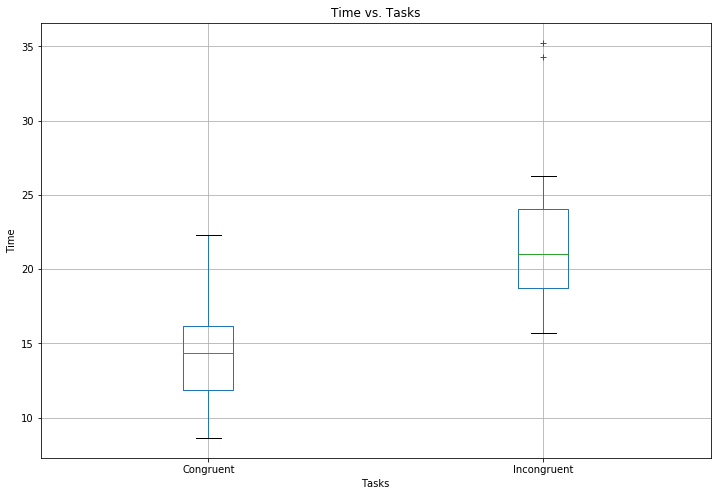

In [5]:
# 在这里创建可视化图表，做boxplot图
plt.figure()
df.plot.box(sym="r+",figsize=(12,8),grid=True)
plt.title('Time vs. Tasks')
plt.xlabel('Tasks')
plt.ylabel('Time')

根据以上boxplot，可以明显看出两组数据在所需时间上，无论是平均数，IQR等，完成不一致任务所需的时间，都明显大于完成一致任务所需的时间。其中，完成不一致任务里的两个最大值，被识别为outlier。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

根据我们在之前所做的假设，即

零假设$$H_0：t_c=t_i$$备择假设$$H_1: t_c<t_i$$
其中，$t_c$为执行一致任务时所用的时间，为总体均值统计量(population mean)；$t_i$为执行不一致任务时所用的时间，为总体均值统计量(population mean)；

两组样本为相关样本，且总体平均值$\sigma$未知，样本数量n=24，不足30，但也假设基本接近正态分布，应选用左侧检验的配对t检验（paired T-test with left tail test）。自由度为n-1=23，显著性水平$\alpha$定为常用的0.05。

以下将手动计算t检测值。并用stats包进行检验。

In [6]:
#计算两组数据差的平均值
mean_diff = (df['Congruent']-df['Incongruent']).mean()

In [7]:
#计算两组数据差的标准差
sample_std = (df['Congruent']-df['Incongruent']).std()

In [8]:
#计算T-statistics
import math
mean_diff/(sample_std/math.sqrt(24))

-8.020706944109957

In [9]:
#计算左侧检验，t的临界值。此处做了原数据大致呈现正态分布的假设
stats.norm.ppf(q=0.05)

-1.6448536269514729

In [10]:
# 用stats对两组数据进行配对的t检验，此处的p-value为双侧检验的p-value，作为检验
stats.ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

可见，手动计算和用stats包计算出来的t统计值是吻合的，由于计算的t统计值为-8.0207，远小于当$\alpha=0.05$对应的t临界值，因此我们可以拒绝原零假设，转而接受备择假设，即完成一致任务时所需时间，在统计意义上显著的小于完成不一致任务时所需的时间。这点与我的预期一致。

### 参考资料

http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-1-sample-2-sample-and-paired-t-tests

https://www.statsdirect.com/help/parametric_methods/paired_t.htm

https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel

https://support.minitab.com/zh-cn/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/tests-of-means/how-are-dependent-and-independent-samples-different/






